In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

 558_Assignments_Code  'Fondation Final Project'   my_own_code
 data		        Kaggle			  'powerful word.ipynb'


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Model Data Set Generating - mdl_data

In [4]:
'''Loading Data from selected mortality dataset(only 15 columns)'''

df=[] #len=11, each = 1yr
for i in range(2005,2016):
    url = '/content/drive/My Drive/Colab Notebooks/Fondation Final Project/data/mortality_selected/'+str(i)+'.csv'
    df1 = pd.read_csv(url)
    df.append(df1)
    print('Loading data of year',i)
del df1

Loading data of year 2005
Loading data of year 2006
Loading data of year 2007
Loading data of year 2008
Loading data of year 2009
Loading data of year 2010
Loading data of year 2011
Loading data of year 2012
Loading data of year 2013
Loading data of year 2014
Loading data of year 2015


In [5]:
df[0][:2]

,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,activity_code,race,5y_age_band_recode,rankable_cause_recode
0,11.0,NaN,0,1,F,45,M,2,2005,U,7.0,NaN,1,10,4
1,13.0,NaN,0,1,M,61,D,7,2005,U,7.0,NaN,1,13,13


In [6]:
'''drop unused columns'''
'''Used ones: Year, Age, Sex, Race, rankable_cause_recode，month_of_death，'marital_status' '''
#use year,sex,race,age_band, cause_recode
unused_cols = ['education_1989_revision','education_2003_revision','education_reporting_flag',
               'day_of_week_of_death','injury_at_work', 'manner_of_death', 'activity_code','detail_age']
for i in range(11):
    df[i].drop(unused_cols, axis=1, inplace=True)
    print(df[i].columns.values)

['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_ban

In [0]:
mdl_data = df[0]
for i in range(1,11):
  mdl_data = pd.concat([mdl_data,df[i]], axis=0)
#print(mdl_data['current_data_year'].unique())
del df

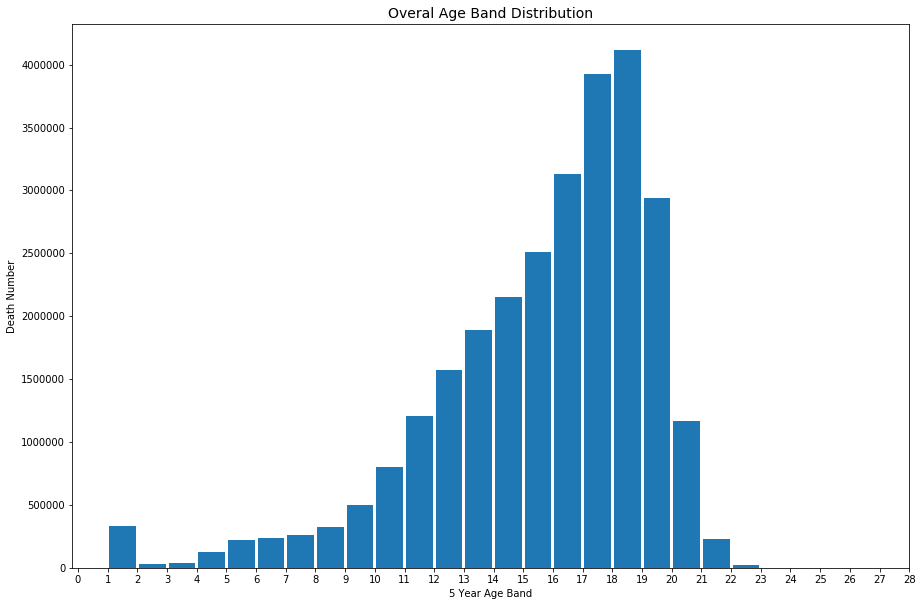

In [8]:
#Histogram

plt.figure(figsize=(15,10))
binblock=np.arange(1,27)
plt.hist(mdl_data['5y_age_band_recode'], bins=binblock, rwidth=0.9)
plt.title("Overal Age Band Distribution", fontsize=14)
plt.xlabel('5 Year Age Band')
plt.ylabel('Death Number')
plt.xticks(np.arange(0,29))
plt.show()